<a href="https://colab.research.google.com/github/nus1985code/E--Commerce-EDA/blob/main/Cluster_socio_economic_and_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The goal of this project is to segment countries based on multiple socio-economic and health indicators to identify similar groups. This can help policymakers, NGOs, or international organizations to design better-targeted interventions for development, healthcare, and economic support.

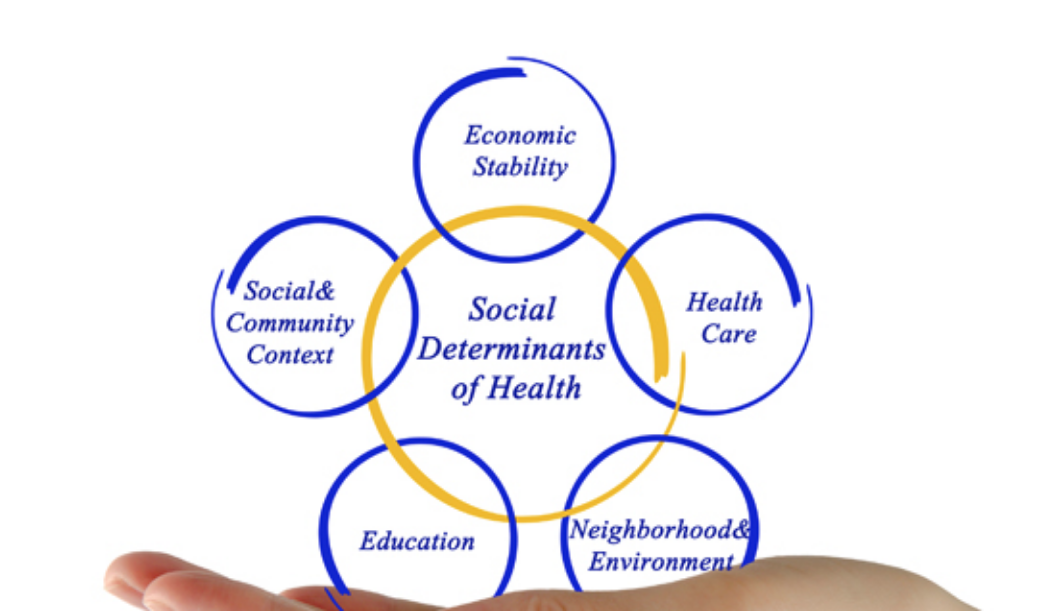

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
df = pd.read_csv('/content/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [177]:
df.columns


Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [178]:
df.shape

(167, 10)

In [179]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#📊 Key Summary of the Dataset (167 Countries)
Child Mortality (child_mort)

Average: 38.27 deaths per 1,000 births

Range: From 2.6 to 208, indicating big differences in child health globally

Exports (exports) and Imports (imports)

Exports: Avg. 41.11% of GDP, Max: 200%

Imports: Avg. 46.89% of GDP, Max: 174%

Trade exposure is highly variable

Health Spending (health)

Mean: 6.82% of GDP

Ranges from 1.81% to 17.9%

Most countries spend between 5%–9% on health

Income (income)

Mean income per person: $17,144, but with large variation (up to $125,000)

25% of countries earn less than $3,355

Inflation (inflation)

Mean: 7.78%, but with high variability

Min: -4.21% (deflation), Max: 104% (hyperinflation)

Life Expectancy (life_expec)

Average: 70.56 years

Ranges from 32.1 to 82.8 years

Fertility Rate (total_fer)

Mean: 2.95 children per woman

High variation: some countries as low as 1.15, others as high as 7.49

GDP per Capita (gdpp)

Average: $12,964

Huge range: $231 to $105,000

50% of countries earn below $4,660



In [180]:
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [181]:
duplicates = df[df.duplicated(keep=False)]  # Show all duplicate rows
print(duplicates)

Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


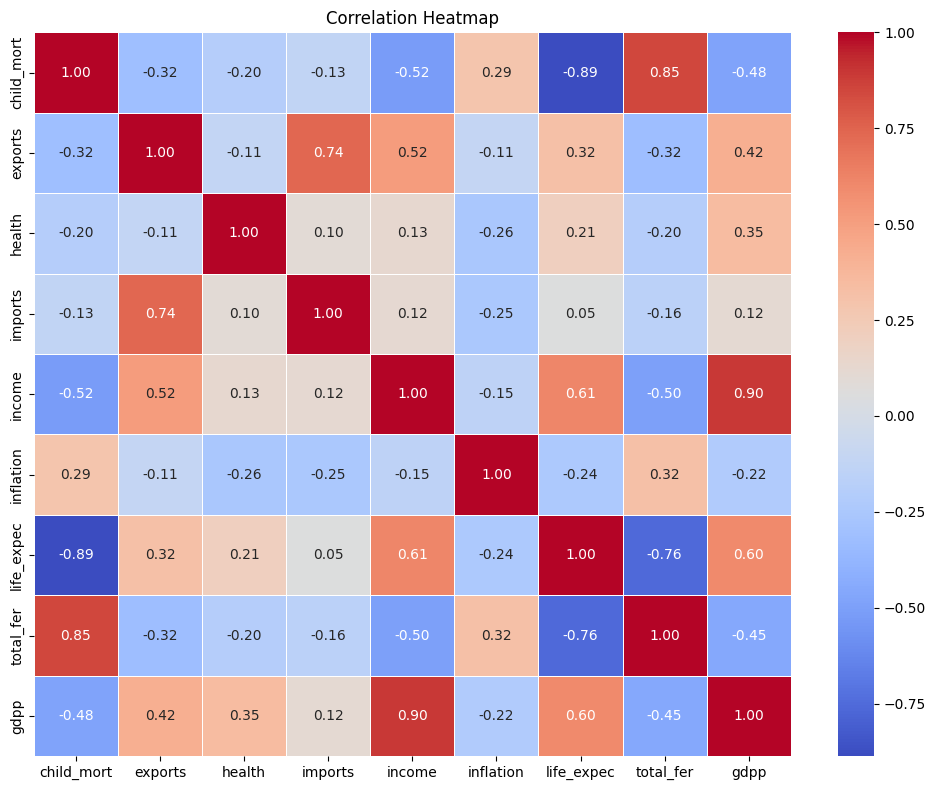

In [183]:
# Correlation matrix for only numerical columns
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

#🔑 Key Correlation Insights:
High Negative Correlation:

child_mort ↔ life_expec: -0.88 → Countries with high child mortality tend to have lower life expectancy.

total_fer ↔ life_expec: -0.76 → Higher fertility rates are associated with lower life expectancy.

child_mort ↔ income: -0.52 → Higher child mortality in lower-income countries.

total_fer ↔ income: -0.50 → Higher fertility is common in lower-income regions.

High Positive Correlation:

income ↔ gdpp: 0.89 → Strong positive relationship between income and GDP per capita.

imports ↔ exports: 0.73 → Economies that import more also export more.

income ↔ life_expec: 0.61 → Richer countries tend to have longer life expectancies.

Moderate Correlation:

gdpp ↔ life_expec: 0.60 → GDP per capita moderately increases with life expectancy.

exports ↔ income: 0.52 → Exporting economies often have higher income.

# SKEWNESS

In [184]:

from scipy.stats import skew as sk

# Calculate skewness for numerical columns
skewness = df.select_dtypes(include='number').apply(sk)

# Define skewness category
def skew_category(x):
    if abs(x) < 0.5:
        return "Approximately Symmetric"
    elif 0.5 <= abs(x) < 1:
        return "Moderately Skewed"
    else:
        return "Highly Skewed"

# Create results table
skew_results = pd.DataFrame({
    'Skewness Value': skewness,
    'Skewness Category': skewness.apply(skew_category),
    'Direction': skewness.apply(lambda x: "Positive (Right)" if x > 0 else "Negative (Left)")
})

# Display the results
print(skew_results)

            Skewness Value  Skewness Category         Direction
child_mort        1.437710      Highly Skewed  Positive (Right)
exports           2.423800      Highly Skewed  Positive (Right)
health            0.699391  Moderately Skewed  Positive (Right)
imports           1.888120      Highly Skewed  Positive (Right)
income            2.211386      Highly Skewed  Positive (Right)
inflation         5.107640      Highly Skewed  Positive (Right)
life_expec       -0.962252  Moderately Skewed   Negative (Left)
total_fer         0.958383  Moderately Skewed  Positive (Right)
gdpp              2.198079      Highly Skewed  Positive (Right)


# Transformation Techniques

In [185]:
from scipy import stats

# Define skewed variables
skewed_vars = ['child_mort', 'exports', 'imports', 'income', 'inflation', 'gdpp']

# Final function to apply transformations, print checks, and store results
def apply_all_transforms(df, skewed_vars):
    results = []

    for var in skewed_vars:
        original_skew = df[var].skew()
        result = {
            'Variable': var,
            'Original Skew': original_skew,
            'Log Skew': None,
            'Sqrt Skew': None,
            'Box-Cox Skew': None,
            'Yeo-Johnson Skew': None
        }

        is_positive = (df[var] > 0).all()
        is_non_negative = (df[var] >= 0).all()

        # Show Box-Cox warning
        if not is_positive:
            print(f"⚠️ {var} has non-positive values. Use Yeo-Johnson instead of Box-Cox.")
        else:
            print(f"✅ {var} is safe for Box-Cox.")

        # Apply Log Transform
        if is_positive:
            log_transformed = np.log1p(df[var])
            result['Log Skew'] = log_transformed.skew()
        else:
            result['Log Skew'] = "N/A (non-positive data)"

        # Apply Sqrt Transform
        if is_non_negative:
            sqrt_transformed = np.sqrt(df[var])
            result['Sqrt Skew'] = sqrt_transformed.skew()
        else:
            result['Sqrt Skew'] = "N/A (negative data)"

        # Apply Box-Cox Transform
        if is_positive:
            boxcox_transformed, _ = stats.boxcox(df[var])
            result['Box-Cox Skew'] = pd.Series(boxcox_transformed).skew()
        else:
            result['Box-Cox Skew'] = "N/A (non-positive data)"

        # Apply Yeo-Johnson Transform and store in df
        yj_transformed, _ = stats.yeojohnson(df[var])
        df[var + '_yj'] = yj_transformed  # store new column
        result['Yeo-Johnson Skew'] = pd.Series(yj_transformed).skew()

        results.append(result)

    return df, pd.DataFrame(results).set_index("Variable")

# ✅ Apply everything in one step
df, df_transformed = apply_all_transforms(df, skewed_vars)

# Check transformed summary
print(df_transformed)


✅ child_mort is safe for Box-Cox.
✅ exports is safe for Box-Cox.
✅ imports is safe for Box-Cox.
✅ income is safe for Box-Cox.
⚠️ inflation has non-positive values. Use Yeo-Johnson instead of Box-Cox.
✅ gdpp is safe for Box-Cox.
            Original Skew                 Log Skew            Sqrt Skew  \
Variable                                                                  
child_mort       1.450774                  0.06616             0.720085   
exports          2.445824                -1.088961             0.742302   
imports          1.905276                -1.822794             0.475126   
income           2.231480                -0.235823             0.856671   
inflation        5.154049  N/A (non-positive data)  N/A (negative data)   
gdpp             2.218051                 0.006548             1.142897   

                       Box-Cox Skew  Yeo-Johnson Skew  
Variable                                               
child_mort                 -0.00408          0.015754  
exp

In [186]:
from scipy.stats import skew as sk

# Filter for transformed columns only
yj_columns = [col for col in df.columns if col.endswith('_yj')]

# Calculate skewness for Yeo-Johnson transformed columns
skewness_yj = df[yj_columns].apply(sk)

# Define skewness category
def skew_category(x):
    if abs(x) < 0.5:
        return "Approximately Symmetric"
    elif 0.5 <= abs(x) < 1:
        return "Moderately Skewed"
    else:
        return "Highly Skewed"

# Create new results table
skew_results_yj = pd.DataFrame({
    'Skewness Value': skewness_yj,
    'Skewness Category': skewness_yj.apply(skew_category),
    'Direction': skewness_yj.apply(lambda x: "Positive (Right)" if x > 0 else "Negative (Left)")
})

print(skew_results_yj)


               Skewness Value        Skewness Category         Direction
child_mort_yj        0.015612  Approximately Symmetric  Positive (Right)
exports_yj           0.099135  Approximately Symmetric  Positive (Right)
imports_yj           0.163857  Approximately Symmetric  Positive (Right)
income_yj           -0.035544  Approximately Symmetric   Negative (Left)
inflation_yj         0.180863  Approximately Symmetric  Positive (Right)
gdpp_yj              0.001110  Approximately Symmetric  Positive (Right)


In [187]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'child_mort_yj',
       'exports_yj', 'imports_yj', 'income_yj', 'inflation_yj', 'gdpp_yj'],
      dtype='object')

In [188]:
# Drop original skewed columns
cols_to_drop = ['child_mort', 'exports', 'imports', 'income', 'inflation', 'gdpp']
df.drop(columns=cols_to_drop, inplace=True)

# Rename _yj columns for easier access
df.rename(columns=lambda x: x.replace('_yj', '') if x.endswith('_yj') else x, inplace=True)

# Final columns list
print(df.columns)


Index(['country', 'health', 'life_expec', 'total_fer', 'child_mort', 'exports',
       'imports', 'income', 'inflation', 'gdpp'],
      dtype='object')


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   health      167 non-null    float64
 2   life_expec  167 non-null    float64
 3   total_fer   167 non-null    float64
 4   child_mort  167 non-null    float64
 5   exports     167 non-null    float64
 6   imports     167 non-null    float64
 7   income      167 non-null    float64
 8   inflation   167 non-null    float64
 9   gdpp        167 non-null    float64
dtypes: float64(9), object(1)
memory usage: 13.2+ KB


# Univariate Analysis

#🔸 1.Child Mortality (child_mort)

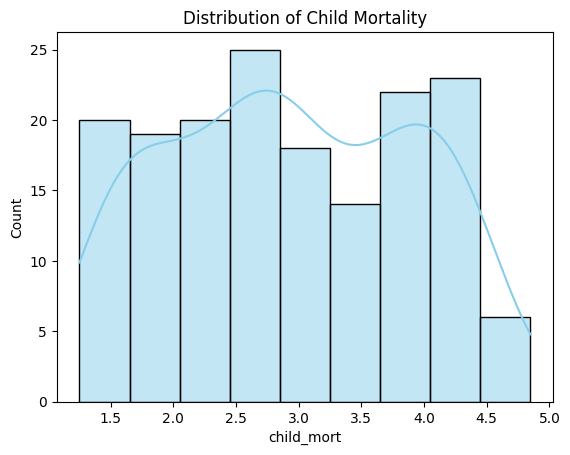

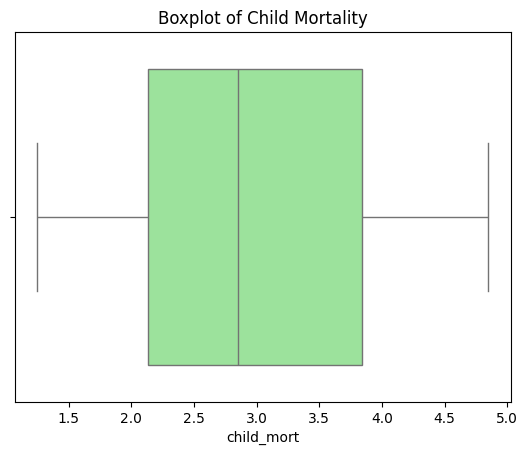

In [190]:
# Histogram
sns.histplot(df['child_mort'], kde=True, color='skyblue')
plt.title('Distribution of Child Mortality')
plt.show()

# Boxplot
sns.boxplot(x=df['child_mort'], color='lightgreen')
plt.title('Boxplot of Child Mortality')
plt.show()


##

###The data shows moderate right-skewness (mean 2.93 > median 2.85) with tight clustering (std 0.97) and no extreme outliers (range 1.25–4.85).

#🔸 2. Income (income)

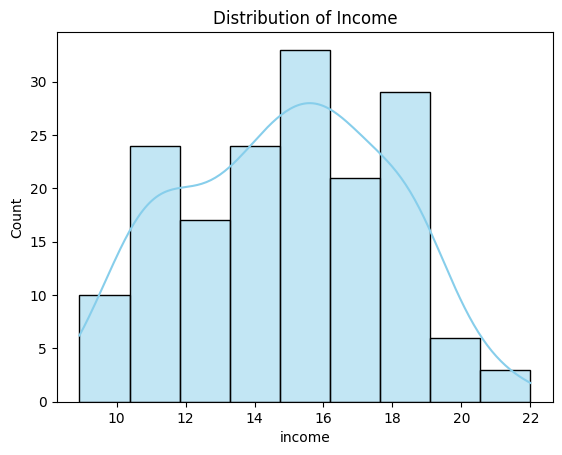

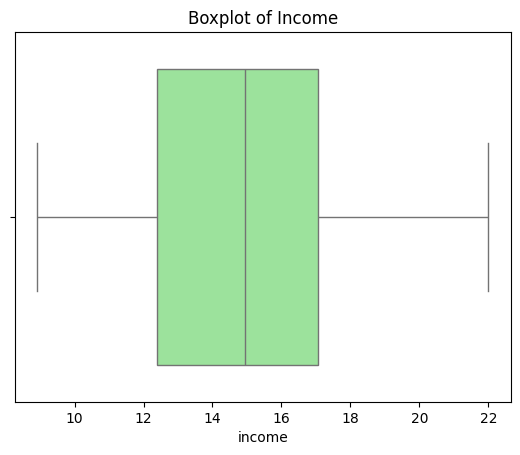

In [191]:
# Histogram
sns.histplot(df['income'], kde=True, color='skyblue')
plt.title('Distribution of Income')
plt.show()

# Boxplot
sns.boxplot(x=df['income'], color='lightgreen')
plt.title('Boxplot of Income')
plt.show()

###Income distribution is nearly symmetric (mean ≈ median ~14.9) with low-moderate spread (std ~3.0), ranging tightly between ~8.9 and 22.0. No extreme outliers detected.

#🔸 3. Life Expectancy (life_expec)

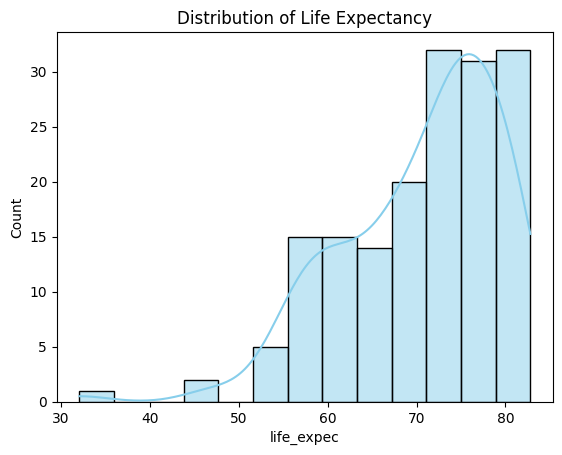

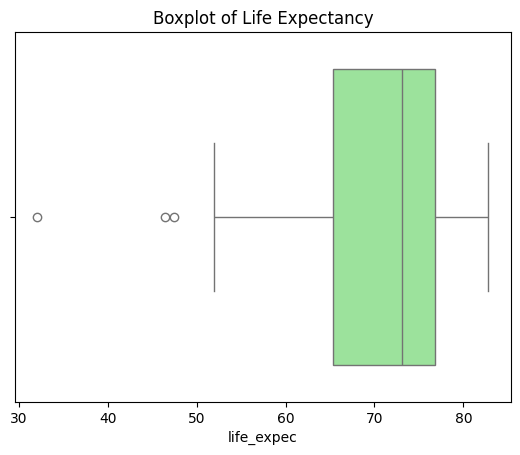

In [192]:
# Histogram
sns.histplot(df['life_expec'], kde=True, color='skyblue')
plt.title('Distribution of Life Expectancy')
plt.show()

# Boxplot
sns.boxplot(x=df['life_expec'], color='lightgreen')
plt.title('Boxplot of Life Expectancy')
plt.show()

###Life expectancy is left-skewed (mean 70.6 < median 73.1) with one extreme low outlier (min 32.1), while 75% of values cluster tightly between 65.3–82.8 years.

#🔸 4. GDP per Capita (gdpp)

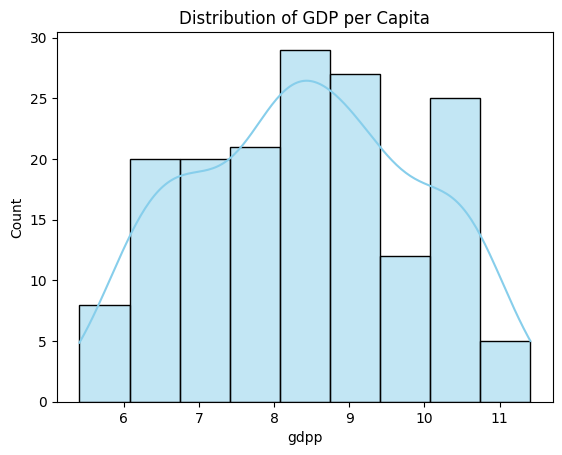

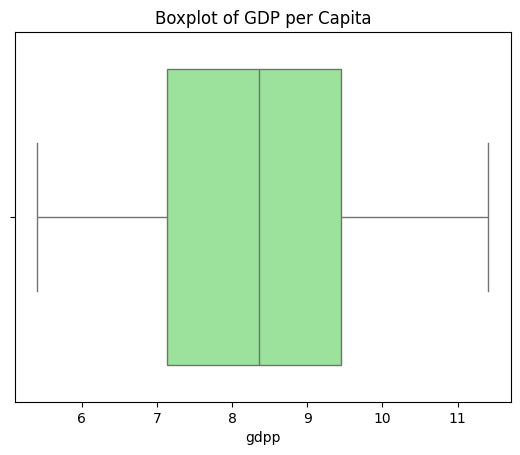

In [193]:
# Histogram
sns.histplot(df['gdpp'], kde=True, color='skyblue')
plt.title('Distribution of GDP per Capita')
plt.show()

# Boxplot
sns.boxplot(x=df['gdpp'], color='lightgreen')
plt.title('Boxplot of GDP per Capita')
plt.show()

###GDP per capita is nearly symmetric (mean ≈ median ~8.4) with low variability (std ~1.47), showing consistent economic output across most nations (range 5.4–11.4).

The tight interquartile range (7.1–9.4) suggests most countries cluster within a narrow band of middle-income development.

#🔸 5. Inflation (inflation)

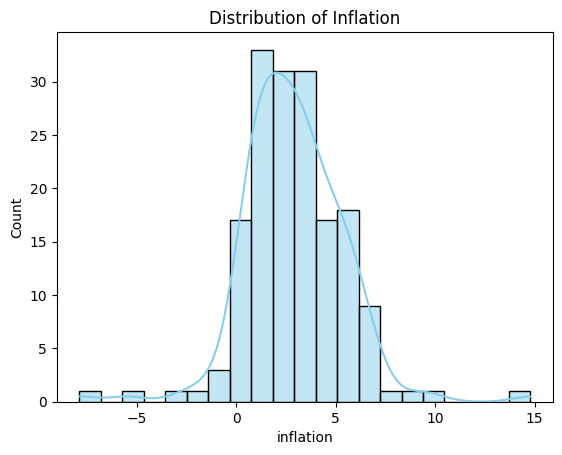

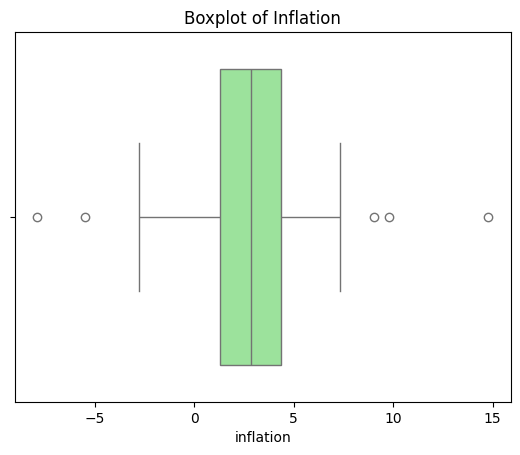

In [194]:
# Histogram
sns.histplot(df['inflation'], kde=True, color='skyblue')
plt.title('Distribution of Inflation')
plt.show()

# Boxplot
sns.boxplot(x=df['inflation'], color='lightgreen')
plt.title('Boxplot of Inflation')
plt.show()


###nflation shows right-skewed volatility (mean 2.89 > median 2.83) with extreme swings (std 2.5, range -7.9 to 14.8), revealing both deflationary pressures and high-inflation outliers.


25% of economies face near-zero/negative inflation (≤1.3)

75% remain under 4.4%, but extreme cases (max 14.8).

#Bivariate Analysis

In [195]:
print(df['inflation'].describe())

count    167.000000
mean       2.891989
std        2.503770
min       -7.884908
25%        1.299163
50%        2.830919
75%        4.369438
max       14.780878
Name: inflation, dtype: float64


In [196]:
df.columns

Index(['country', 'health', 'life_expec', 'total_fer', 'child_mort', 'exports',
       'imports', 'income', 'inflation', 'gdpp'],
      dtype='object')

#  Group by 'income' bins → mean of life indicators

In [197]:
df['income_bin'] = pd.qcut(df['income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df.groupby('income_bin')[['life_expec', 'child_mort', 'total_fer']].mean()


<ipython-input-197-ed80b6468a79>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,life_expec,child_mort,total_fer
income_bin,,,
Low,59.759524,4.053182,4.871190
Medium,69.969048,3.238615,2.913333
High,73.619512,2.592217,2.081707
Very High,78.947619,1.845599,1.905000


#### Life expectancy rises steadily with income (59.8 → 78.9 years).

Child mortality drops sharply (4.05 → 1.85 deaths per 1,000) as income increases.

Fertility rates decline with wealth (4.87 → 1.91 children per woman), nearing replacement level in very high-income groups.

#Scatter Plot: income vs life_expec

<Axes: xlabel='income', ylabel='life_expec'>

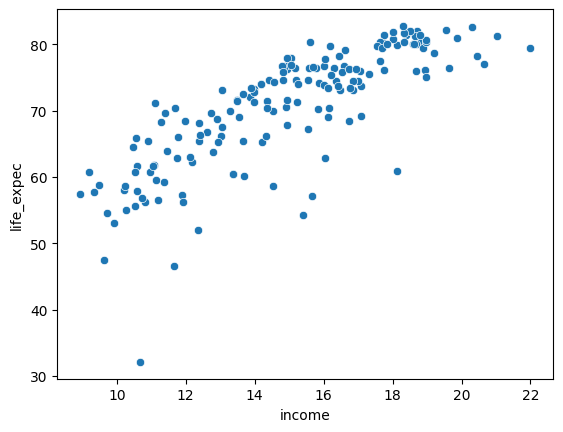

In [198]:
sns.scatterplot(data=df, x='income', y='life_expec')

# Group by country → get top 5 by GDP

In [199]:
df.groupby('country')['gdpp'].mean().sort_values(ascending=False).head(5)


,gdpp
country,
Luxembourg,11.408503
Norway,11.234291
Switzerland,11.075575
Qatar,11.017724
Denmark,10.830258


### Luxembourg leads with the highest GDP per capita (11.41), followed closely by Norway, Switzerland, Qatar, and Denmark, all above 10.83.

# Cross-analysis: total_fer vs child_mort (scatter plot)

<Axes: xlabel='total_fer', ylabel='child_mort'>

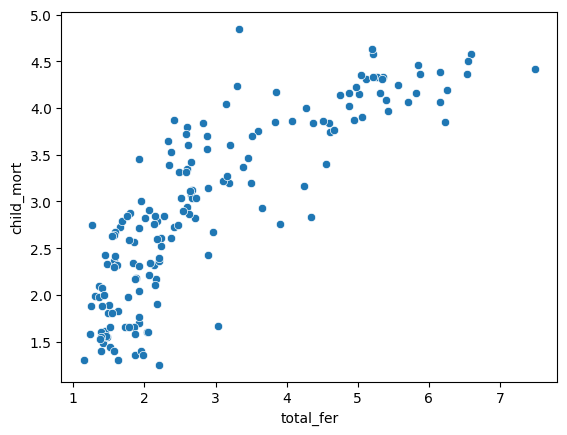

In [200]:
sns.scatterplot(data=df, x='total_fer', y='child_mort')


# Outliers

Numerical Columns: ['health', 'life_expec', 'total_fer', 'child_mort', 'exports', 'imports', 'income', 'inflation', 'gdpp']
Object Columns: ['country']


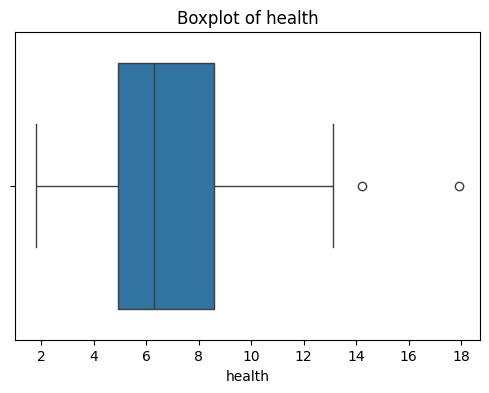

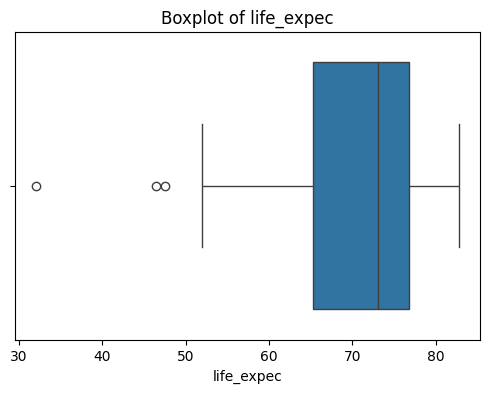

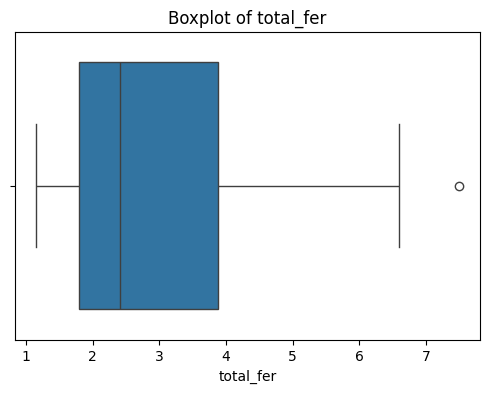

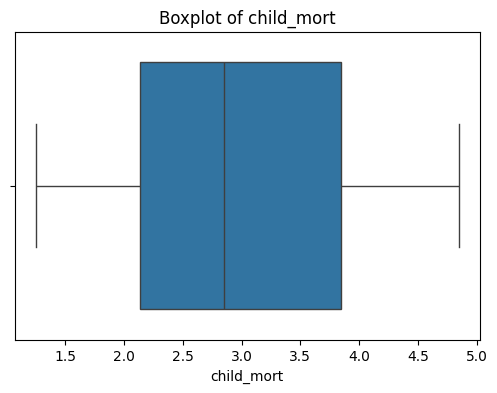

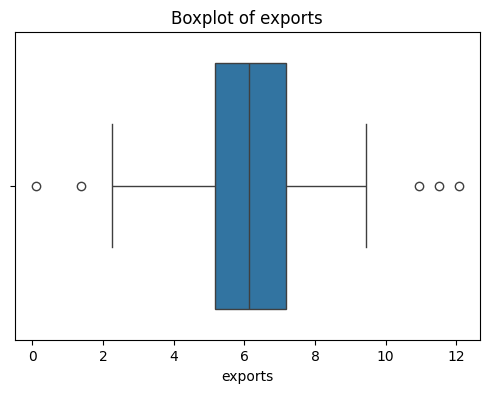

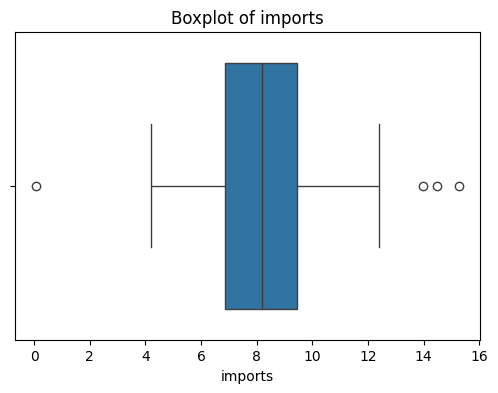

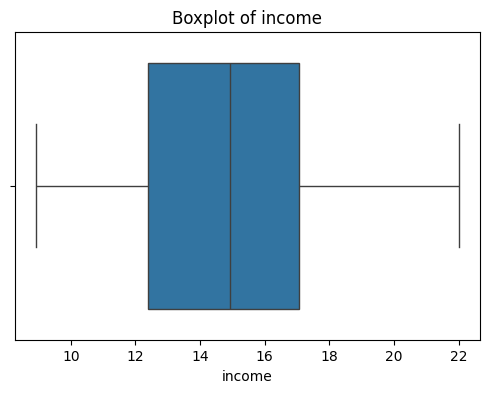

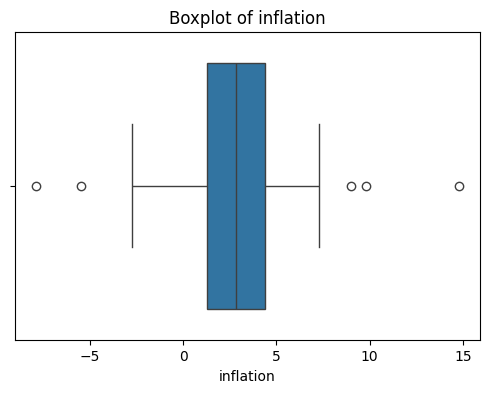

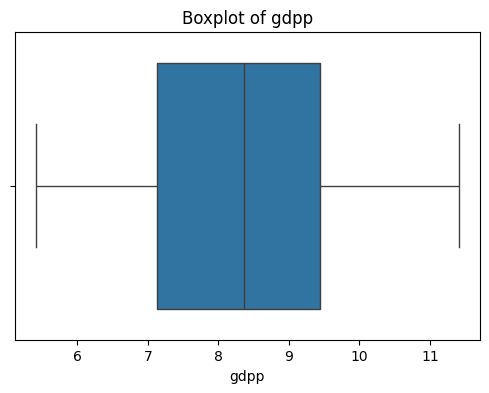

In [201]:
# Function to separate numerical and object columns
def filter_columns_by_type(df):
    numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
    object_columns = df.select_dtypes(include=['object']).columns.tolist()
    return numerical_columns, object_columns

# Apply function
numerical_cols, object_cols = filter_columns_by_type(df)

print("Numerical Columns:", numerical_cols)
print("Object Columns:", object_cols)

# Plot boxplots for each numerical column
for column in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [202]:
def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Apply capping
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

    return df

# Numerical columns
numerical_cols = ['health', 'life_expec', 'total_fer', 'child_mort', 'exports', 'imports', 'income', 'inflation', 'gdpp']

# Apply the function to your DataFrame
df = cap_outliers_iqr(df, numerical_cols)


In [203]:
def check_remaining_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers.empty:
            print(f"⚠️ {col} still has {len(outliers)} outliers.")
        else:
            print(f"✅ {col} has no remaining outliers.")

# Run the check
check_remaining_outliers(df, numerical_cols)


✅ health has no remaining outliers.
✅ life_expec has no remaining outliers.
✅ total_fer has no remaining outliers.
✅ child_mort has no remaining outliers.
✅ exports has no remaining outliers.
✅ imports has no remaining outliers.
✅ income has no remaining outliers.
✅ inflation has no remaining outliers.
✅ gdpp has no remaining outliers.


# Standard Scaling

In [204]:
df.columns

Index(['country', 'health', 'life_expec', 'total_fer', 'child_mort', 'exports',
       'imports', 'income', 'inflation', 'gdpp', 'income_bin'],
      dtype='object')

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     167 non-null    object  
 1   health      167 non-null    float64 
 2   life_expec  167 non-null    float64 
 3   total_fer   167 non-null    float64 
 4   child_mort  167 non-null    float64 
 5   exports     167 non-null    float64 
 6   imports     167 non-null    float64 
 7   income      167 non-null    float64 
 8   inflation   167 non-null    float64 
 9   gdpp        167 non-null    float64 
 10  income_bin  167 non-null    category
dtypes: category(1), float64(9), object(1)
memory usage: 13.5+ KB


In [206]:
# Label encode income_bin
df['income_bin'] = df['income_bin'].map({'Low': 0, 'Medium': 1, 'High': 2})


In [207]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale (excluding 'country' and keeping only Yeo-Johnson and others)
columns_to_scale = ['health', 'life_expec', 'total_fer', 'child_mort', 'exports',
       'imports', 'income', 'inflation', 'gdpp', 'income_bin']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform
scaled_array = scaler.fit_transform(df[columns_to_scale])

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_array, columns=columns_to_scale)

df_final = pd.concat([df[['country']], df_scaled], axis=1)

# Check result
print(df_final.head())


               country    health  life_expec  total_fer  child_mort   exports  \
0          Afghanistan  0.296013   -1.702225   1.915276    1.266699 -1.795424   
1              Albania -0.091190    0.663321  -0.862779   -0.220994 -0.405221   
2              Algeria -0.985893    0.686859  -0.036691    0.217834  0.117748   
3               Angola -1.482114   -1.243238   2.141784    1.506186  1.019472   
4  Antigua and Barbuda -0.286671    0.722166  -0.543003   -0.637380  0.419508   

    imports    income  inflation      gdpp  income_bin  
0  0.072478 -1.368935   0.518612 -1.462273   -1.217443  
1  0.246797  0.012538  -0.174931 -0.121133    0.009818  
2 -0.652744  0.232275   1.196680 -0.063195    1.237079  
3 -0.025492 -0.408251   1.708364 -0.219666    0.009818  
4  0.692204  0.572583  -0.817319  0.609228    1.237079  


# K-Means

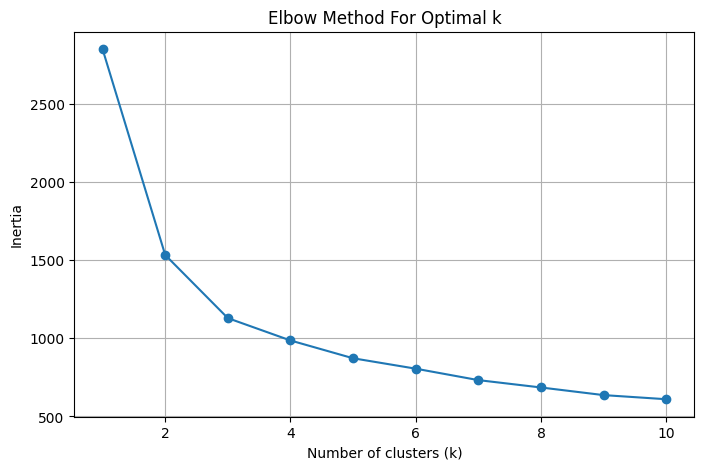

In [218]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop 'country' column before clustering
X = df_final.drop('country', axis=1).copy()
X = X.fillna(X.mean())
# Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k,init = 'k-means++', random_state=100)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [219]:
from sklearn.cluster import KMeans

# Fill NaN values in df_scaled
df_scaled_clean = df_scaled.fillna(df_scaled.mean())

# Apply KMeans
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=100)
df_final['Cluster'] = kmeans.fit_predict(df_scaled_clean)

# Check cluster distribution
print(df_final['Cluster'].value_counts())


Cluster
1    62
0    58
2    47
Name: count, dtype: int64


In [220]:
# numerical columns
numerical_cols = ['health', 'life_expec', 'total_fer', 'child_mort', 'exports',
                  'imports', 'income_bin', 'inflation', 'gdpp']

# Add 'Cluster' to the list
columns_check = list(set(numerical_cols + ['Cluster']))

# Group and calculate mean for each cluster
cluster_profile = df_final[columns_check].groupby('Cluster').mean()

# Print the result
print(cluster_profile)


         total_fer      gdpp  life_expec    health  child_mort   exports  \
Cluster                                                                    
0        -0.795355  1.018769    0.921628  0.568494   -1.085420  0.541537   
1        -0.234724 -0.045948    0.036723 -0.460264    0.127580  0.017453   
2         1.291138 -1.196592   -1.185771 -0.094389    1.171158 -0.691303   

         inflation  income_bin   imports  
Cluster                                   
0        -0.787052    1.181294  0.263440  
1         0.460898    0.448126 -0.208491  
2         0.363262   -1.086883 -0.050065  


In [221]:
comparison = pd.crosstab(df['income_bin'], df_final['Cluster'])
print(comparison)


Cluster      0   1   2
income_bin            
0.0          0   0  42
1.0          1  36   5
2.0         21  20   0



✅ The clusters align well with income levels:

Cluster 2 = low-income/under- developed countries,with low income, poor health outcomes, and economic struggles.

Cluster 1 = high-income/developed countries rich, healthy, low child mortality, strong economy.

Cluster 0 = Average economy with moderate health and slightly higher inflation, possibly emerging market countries.

#Map countries to their clusters

In [222]:
# Add cluster labels to the original dataframe (with 'country')
df['Cluster'] = df_final['Cluster']
df[['country', 'Cluster']].head()


,country,Cluster
0,Afghanistan,2
1,Albania,1
2,Algeria,1
3,Angola,2
4,Antigua and Barbuda,0


In [223]:
import plotly.express as px

# Add cluster info to the original dataframe
df['Cluster'] = df_final['Cluster']

# Create interactive plot
fig = px.scatter(
    df,
    x='gdpp',
    y='life_expec',
    color='Cluster',
    hover_name='country',
    title='Country Clustering by GDP and Life Expectancy',
    labels={'gdpp': 'GDP per Capita', 'life_expec': 'Life Expectancy'},
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.show()


#Visualization

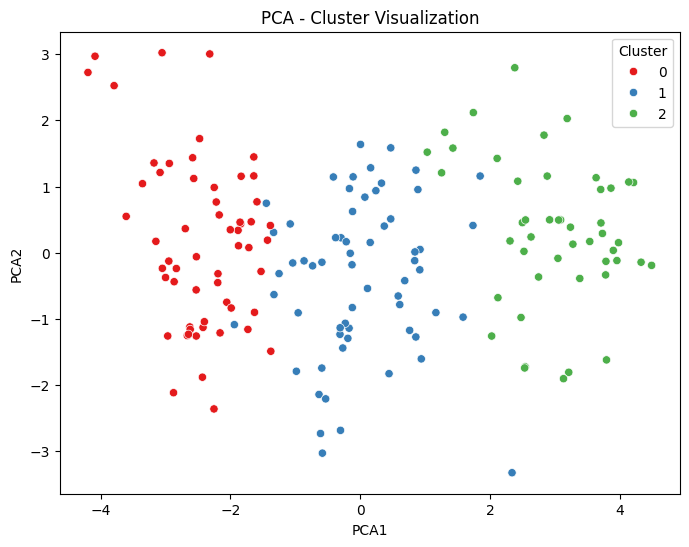

In [224]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Fill NaN values in df_scaled
df_scaled_clean = df_scaled.fillna(df_scaled.mean())

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled_clean)

# Add PCA components to the dataframe
df_final['PCA1'] = pca_components[:, 0]
df_final['PCA2'] = pca_components[:, 1]

# Create a scatter plot with PCA components
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_final, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('PCA - Cluster Visualization')
plt.show()



Green - Cluster 2 = low-income countries.

Blue -  Cluster 1 = high-income countries.

Red -   Cluster 0 = mostly mid-income, some high-income.

The clusters are fairly well-separated, especially between green (Cluster 2) and the others, which is a good sign.

There is some overlap between red (Cluster 0) and blue (Cluster 1) in the middle — that's normal when using only two principal components for high-dimensional data.

# Silhouette Score

In [225]:
print(df_scaled.isnull().sum())

health         0
life_expec     0
total_fer      0
child_mort     0
exports        0
imports        0
income         0
inflation      0
gdpp           0
income_bin    42
dtype: int64


In [226]:
from sklearn.metrics import silhouette_score

# Fill NaN values in df_scaled
df_scaled_clean = df_scaled.fillna(df_scaled.mean())

# Use df_scaled_clean instead of X
score = silhouette_score(df_scaled_clean, df_final['Cluster'])
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.2515


#DBSCAN

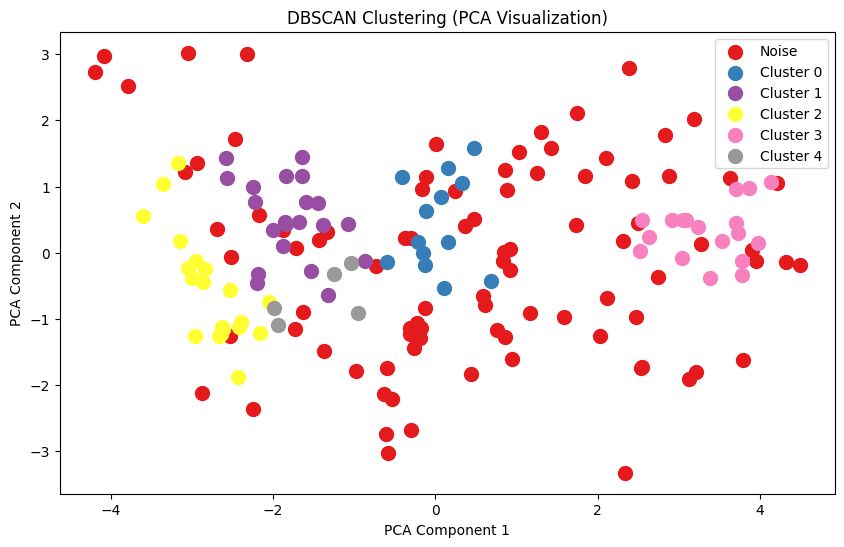

In [233]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Preprocess data
df_scaled_clean = df_scaled.fillna(df_scaled.mean())

# Step 2: Apply DBSCAN
db = DBSCAN(eps=1.3, min_samples=5)  #
cluster_labels = db.fit_predict(df_scaled_clean)

# Step 3: Assign cluster labels
df_final['Cluster'] = cluster_labels

# Step 4: PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled_clean)

df_final['PCA1'] = pca_components[:, 0]
df_final['PCA2'] = pca_components[:, 1]

# Step 5: Visualize
plt.figure(figsize=(10, 6))
unique_clusters = sorted(df_final['Cluster'].unique())
colors = plt.cm.Set1(np.linspace(0, 1, len(unique_clusters)))

for cluster, color in zip(unique_clusters, colors):
    cluster_points = df_final[df_final['Cluster'] == cluster]
    label = f'Cluster {cluster}' if cluster != -1 else 'Noise'
    plt.scatter(cluster_points['PCA1'], cluster_points['PCA2'], s=100, label=label, color=color)

plt.title('DBSCAN Clustering (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
